## Project Sucess

This notebooks contains success for given project by analysing number of completed, on-going, and backlog PR

In [11]:
# Installing required packages
! pip install PyMySQL
! pip install ipython-sql
! pip install mysqlclient
! pip install pandas
! pip install matplotlib
! pip install numpy
! pip install mlxtend --upgrade

In [12]:
# Conecting to the MySQL database
import pymysql

db_name = "se_assignment"
db_host = "localhost"
db_username = "root"
db_password = "izzath"

try:
    conn = pymysql.connect(host = db_host, port = int(3306), user = db_username, password = db_password, db = db_name)
except e:
    print (e)
if conn:
    print ("connection successful")
else:
        print ("error")

connection successful


In [13]:
import pandas as pd
# Getting status of each Issue categorized into in-progress, completed, and blocked
df1 = pd.read_sql_query("""SELECT Issue.Status , Project.Name AS Project_Name, repository.Name AS Repo_Name FROM Issue INNER JOIN Project ON Issue.Project_ID = Project.ID INNER JOIN repository ON project.Repository_ID = repository.ID""", conn)

df1 = df1.drop_duplicates()
# Getting only the status column
df2 = df1["Status"].drop_duplicates()

C:\Users\Izzath\AppData\Local\Temp\ipykernel_17196\2015105381.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df1 = pd.read_sql_query("""SELECT Issue.Status , Project.Name AS Project_Name, repository.Name AS Repo_Name FROM Issue INNER JOIN Project ON Issue.Project_ID = Project.ID INNER JOIN repository ON project.Repository_ID = repository.ID""", conn)


In [14]:
# Classification
completed = ['Done', 'Closed', 'Resolved', 'Accepted', 'Published', 'Complete']
in_progress = ['To Do', 'In PR', 'In Progress', 'Open', 'New', 'In Development', 'To Be Tested', 'Testing In Progress', 'Raw', 'Ready for Development', 'Ready to Groom', 'Reviewable', 'Patch Available', 'Reopened', 'In Review', 'Gathering Interest', 'Needs Triage', 'Gathering Impact', 'Waiting for Release', 'Reviewing', 'Backlog', 'Planning', 'To Test', 'Code Review', 'To Develop', 'Ready for Work', 'Scoping', 'In Code Review', 'Investigating' 'Unverified', 'In CR Review', 'Reviewed', 'Selected for Development', 'Debugging With Submitter', 'Needs Design', 'Debugging',  'Development in progress', 'Scheduled','Debugging', 'Development in progress', 'Tested', 'Peer review in progress', 'Integration review in progress', 'Testing in progress',   'Triaged', 'In QE Test', 'Planned Development', 'Pull Request Submitted', 'Automation', 'Needs Scheduling', 'Needs Verification', 'Needs Merge']
blocked = ['Long Term Backlog', 'Short Term Backlog', 'Under Consideration', 'Future Consideration', 'Not Being Considered'  'Returned', 'Invalid', "Won't Fix", 'Waiting (Blocked)',  'Waiting for Reporter', 'Waiting For User Input', 'Blocked', 'Waiting for testing', 'Waiting for integration review', 'Waiting for peer review', 'Waiting for peer review', 'Awaiting Release', 'Awaiting Merge', 'Waiting for Feedback', 'Waiting for Review']

In [15]:
import numpy as np
# How frequently people assigned to PR changes
df3 = pd.read_sql_query("""SELECT Issue.*, Issue_ID, COUNT(CASE WHEN Change_Log.ID > 0 AND Change_Log.Change_Type="PEOPLE" THEN 1 END) AS Freq FROM Issue LEFT JOIN Change_Log ON Issue.ID = Change_Log.Issue_ID GROUP BY Issue.ID HAVING issue.Project_ID = 1""", conn)

C:\Users\Izzath\AppData\Local\Temp\ipykernel_17196\622623338.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df3 = pd.read_sql_query("""SELECT Issue.*, Issue_ID, COUNT(CASE WHEN Change_Log.ID > 0 AND Change_Log.Change_Type="PEOPLE" THEN 1 END) AS Freq FROM Issue LEFT JOIN Change_Log ON Issue.ID = Change_Log.Issue_ID GROUP BY Issue.ID HAVING issue.Project_ID = 1""", conn)


In [16]:
def get_resolution_status(conn):
    df = pd.read_sql_query("""SELECT Resolution FROM Issue WHERE Resolution_Date IS NOT NULL GROUP BY Resolution""", conn)
    return df["Resolution"].to_numpy()

resolution_types = get_resolution_status(conn)

def generate_resolution_days(row):
    if row["Resolution"] in resolution_types :
        return (pd.to_datetime(row["Resolution_Date"]) - pd.to_datetime(row["Creation_Date"])).days
    else:
        return None

C:\Users\Izzath\AppData\Local\Temp\ipykernel_17196\998939367.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query("""SELECT Resolution FROM Issue WHERE Resolution_Date IS NOT NULL GROUP BY Resolution""", conn)


In [17]:
def add_updated_status(row):
    if row["Status"] in completed:
        return "completed"
    elif row["Status"] in in_progress:
        return "in_progress"
    elif row["Status"] in blocked:
        return "blocked"
    else:
        return None

df3["Updated Status"] = df3.apply(add_updated_status, axis=1)
df3["Resolution_Time"] = df3.apply(generate_resolution_days, axis=1)
df3

,ID,Jira_ID,Issue_Key,URL,Title,Description,Description_Text,Description_Code,Type,Priority,...,Pull_Request_URL,Creator_ID,Reporter_ID,Assignee_ID,Project_ID,Sprint_ID,Issue_ID,Freq,Updated Status,Resolution_Time
0,65,77638,XD-3768,https://jira.spring.io/rest/api/2/issue/77638,"""How do I make a job restartable in spring xd""","""The jobs that appear under Executions section...","""""""The jobs that appear under Executions secti...",,Bug,Major,...,,68,68,NaN,1,NaN,NaN,0,in_progress,NaN
1,66,77511,XD-3767,https://jira.spring.io/rest/api/2/issue/77511,"""admin config timezone command does not work""","""Working with Spring-XD version 1.3.2.RELEASE ...","""""""Working with Spring-XD version 1.3.2.RELEAS...",""" xd:>admin config admin config info ad...",Bug,Trivial,...,,69,69,NaN,1,NaN,NaN,0,in_progress,NaN
2,67,77130,XD-3766,https://jira.spring.io/rest/api/2/issue/77130,"""Module Upload command not pushing jar to all ...","""My project 7 node cluster and in that 2 node ...","""""""My project 7 node cluster and in that 2 nod...",,Bug,Major,...,,70,70,NaN,1,NaN,NaN,0,in_progress,NaN
3,68,71950,XD-3765,https://jira.spring.io/rest/api/2/issue/71950,"""Fix stream failover ""","""See https://github.com/spring-projects/spring...","""""""See https://github.com/spring-projects/spri...",,Story,Minor,...,,72,72,71.0,1,NaN,68.0,0,completed,0.0
4,69,71805,XD-3764,https://jira.spring.io/rest/api/2/issue/71805,"""SpringXD Job is still executing even after fo...","""I'm trying to run a Job on SpringXD and the j...","""""""I'm trying to run a Job on SpringXD and the...",,Bug,Major,...,,73,73,NaN,1,NaN,NaN,0,in_progress,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3702,3770,48120,XD-2,https://jira.spring.io/rest/api/2/issue/48120,"""HDFS Core writing helper classes""","""Simple file writer that has existed in the sp...","""""""Simple file writer that has existed in the ...",,Story,Minor,...,,72,72,72.0,1,NaN,3770.0,0,completed,87.0
3703,3771,48119,XD-1,https://jira.spring.io/rest/api/2/issue/48119,"""HDFS ItemWriter""","""Base integration of core HDFS writer function...","""""""Base integration of core HDFS writer functi...",,Story,Minor,...,,72,72,107.0,1,65.0,3771.0,1,completed,26.0
3704,3773,83061,XD-3769,https://jira.spring.io/rest/api/2/issue/83061,"""Upgrade to Spring Boot 2.1.0""","""We tried upgrading from Spring Boot 2.0.6 to ...","""""""We tried upgrading from Spring Boot 2.0.6 t...",,Bug,Blocker,...,,256,256,NaN,1,NaN,3773.0,0,in_progress,NaN
3705,3774,60674,XD-2355,https://jira.spring.io/rest/api/2/issue/60674,"""xd-singlenode --verbose prints configuration ...","""If you start xd-singlenode with the --verbose...","""""""If you start xd-singlenode with the --verbo...",""" _____ __ _____...",Bug,Minor,...,,149,149,91.0,1,17.0,3774.0,1,completed,190.0


In [18]:
print(blocked)

['Long Term Backlog', 'Short Term Backlog', 'Under Consideration', 'Future Consideration', 'Not Being ConsideredReturned', 'Invalid', "Won't Fix", 'Waiting (Blocked)', 'Waiting for Reporter', 'Waiting For User Input', 'Blocked', 'Waiting for testing', 'Waiting for integration review', 'Waiting for peer review', 'Waiting for peer review', 'Awaiting Release', 'Awaiting Merge', 'Waiting for Feedback', 'Waiting for Review']


In [19]:
import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

file = open("rules.csv", "w")

# Apply apriori algorithm
df3 = df3.filter(items=["Type", "Priority", "Resolution", "Freq", "Updated Status"])
df_encoded = pd.get_dummies(df3, columns=["Type", "Priority", "Resolution", "Freq", "Updated Status"])

frequent_itemsets = apriori(df_encoded, min_support=0.5, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.6, num_itemsets=1)

for rule in rules[['antecedents', 'consequents']].iterrows():
    file.writelines(str(rule[1]) + "\n\n")

file.close()

In [76]:


def generate_analysis(df, project_name):
    # Analysing Total number of issues
    print(f"{project_name} Analysis")
    total_number_issues = df.shape[0]
    total_number_completed_issues = df[(df["Updated Status"] == "completed")].shape[0]
    total_number_progress_issues = df[(df["Updated Status"] == "in_progress")].shape[0]
    total_number_blocked_issues = df[(df["Updated Status"] == "blocked")].shape[0]
    # Stats about completing a issue    
    df["Resolution_Time"] = df.apply(generate_resolution_days, axis=1)
    resolution_time_quartiles_q1 = df["Resolution_Time"].quantile(0.25)
    resolution_time_quartiles_q2 = df["Resolution_Time"].quantile(0.5)
    resolution_time_quartiles_q3 = df["Resolution_Time"].quantile(0.75)

    # Getting minimum and maximum resolution times
    min_resolution_time = df["Resolution_Time"].min()
    max_resolution_time = df["Resolution_Time"].max()

    
    total_change_count = (df["Freq"] > 0).sum()

    return [project_name, total_number_issues, total_number_completed_issues, total_number_progress_issues, total_number_blocked_issues, total_change_count, min_resolution_time, resolution_time_quartiles_q1, resolution_time_quartiles_q2, resolution_time_quartiles_q3, max_resolution_time]

def generate(conn):
    df = pd.read_sql_query("SELECT ID, Name FROM Project", conn)
    rows = []

    for index, project_row in df.iterrows():
       project_id = project_row['ID']
       sql_query = f"SELECT Issue.*, Issue_ID, COUNT(CASE WHEN Change_Log.ID > 0 AND Change_Log.Change_Type='PEOPLE' THEN 1 END) AS Freq FROM Issue LEFT JOIN Change_Log ON Issue.ID = Change_Log.Issue_ID GROUP BY Issue.ID HAVING issue.Project_ID = {project_id}"
       df = pd.read_sql_query(sql_query, conn)
       df['Updated Status'] = df.apply(add_updated_status, axis=1)

       rows.append(generate_analysis(df, project_row["Name"]))


    return pd.DataFrame(rows, columns=["Project Name", "Total Issues", "Total Completed Issues", "Total In-progress Issues", "Total Blocked Issues", "Total People Change Issues", "Minimum Resolution Time", "Resolution Time(Q1/days)", "Resolution Time(Q2/days)", "Resolution Time(Q3/days)", "Maximum Resolution Time"])


df4 = generate(conn)
df4


C:\Users\Izzath\AppData\Local\Temp\ipykernel_17196\1298793059.py:24: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query("SELECT ID, Name FROM Project", conn)
C:\Users\Izzath\AppData\Local\Temp\ipykernel_17196\1298793059.py:30: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(sql_query, conn)


Spring XD Analysis


C:\Users\Izzath\AppData\Local\Temp\ipykernel_17196\1298793059.py:30: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(sql_query, conn)


Spring DataCass Analysis


C:\Users\Izzath\AppData\Local\Temp\ipykernel_17196\1298793059.py:30: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(sql_query, conn)


Sonatype Nexus Analysis


C:\Users\Izzath\AppData\Local\Temp\ipykernel_17196\1298793059.py:30: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(sql_query, conn)


Apache Mesos Analysis


C:\Users\Izzath\AppData\Local\Temp\ipykernel_17196\1298793059.py:30: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(sql_query, conn)


Apache Usergrid Analysis


C:\Users\Izzath\AppData\Local\Temp\ipykernel_17196\1298793059.py:30: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(sql_query, conn)


Apache MXNet Analysis


C:\Users\Izzath\AppData\Local\Temp\ipykernel_17196\1298793059.py:30: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(sql_query, conn)


Alloy Framework Analysis


C:\Users\Izzath\AppData\Local\Temp\ipykernel_17196\1298793059.py:30: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(sql_query, conn)


Aptana Studio Analysis


C:\Users\Izzath\AppData\Local\Temp\ipykernel_17196\1298793059.py:30: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(sql_query, conn)


Command-Line Interface Analysis


C:\Users\Izzath\AppData\Local\Temp\ipykernel_17196\1298793059.py:30: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(sql_query, conn)


Appcelerator Daemon Analysis


C:\Users\Izzath\AppData\Local\Temp\ipykernel_17196\1298793059.py:30: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(sql_query, conn)


Titanium Mobile Platform Analysis


C:\Users\Izzath\AppData\Local\Temp\ipykernel_17196\1298793059.py:30: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(sql_query, conn)


The Titanium SDK  Analysis


C:\Users\Izzath\AppData\Local\Temp\ipykernel_17196\1298793059.py:30: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(sql_query, conn)


Appcelerator Studio Analysis


C:\Users\Izzath\AppData\Local\Temp\ipykernel_17196\1298793059.py:30: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(sql_query, conn)


Atlassian Bamboo  Analysis


C:\Users\Izzath\AppData\Local\Temp\ipykernel_17196\1298793059.py:30: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(sql_query, conn)


Atlassian Clover Analysis


C:\Users\Izzath\AppData\Local\Temp\ipykernel_17196\1298793059.py:30: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(sql_query, conn)


Atlassian Crowd Analysis


C:\Users\Izzath\AppData\Local\Temp\ipykernel_17196\1298793059.py:30: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(sql_query, conn)


Atlassian FishEye Analysis


C:\Users\Izzath\AppData\Local\Temp\ipykernel_17196\1298793059.py:30: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(sql_query, conn)


Atlassian Jira Server Analysis


C:\Users\Izzath\AppData\Local\Temp\ipykernel_17196\1298793059.py:30: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(sql_query, conn)


Atlassian Software Cloud Analysis


C:\Users\Izzath\AppData\Local\Temp\ipykernel_17196\1298793059.py:30: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(sql_query, conn)


Atlassian Atlassian Software Server Analysis


C:\Users\Izzath\AppData\Local\Temp\ipykernel_17196\1298793059.py:30: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(sql_query, conn)


Atlassian Confluence Cloud Analysis


C:\Users\Izzath\AppData\Local\Temp\ipykernel_17196\1298793059.py:30: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(sql_query, conn)


Atlassian Confluence Server Analysis


C:\Users\Izzath\AppData\Local\Temp\ipykernel_17196\1298793059.py:30: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(sql_query, conn)


Hyperledger Blockchain Explorer Analysis


C:\Users\Izzath\AppData\Local\Temp\ipykernel_17196\1298793059.py:30: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(sql_query, conn)


Hyperledger Fabric Analysis


C:\Users\Izzath\AppData\Local\Temp\ipykernel_17196\1298793059.py:30: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(sql_query, conn)


Hyperledger Indy Node Analysis


C:\Users\Izzath\AppData\Local\Temp\ipykernel_17196\1298793059.py:30: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(sql_query, conn)


Hyperledger Indy SDK Analysis


C:\Users\Izzath\AppData\Local\Temp\ipykernel_17196\1298793059.py:30: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(sql_query, conn)


Hyperledger Sawtooth Analysis


C:\Users\Izzath\AppData\Local\Temp\ipykernel_17196\1298793059.py:30: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(sql_query, conn)


Lsstcorp Data management Analysis


C:\Users\Izzath\AppData\Local\Temp\ipykernel_17196\1298793059.py:30: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(sql_query, conn)


Lyrasis Dura Cloud Analysis


C:\Users\Izzath\AppData\Local\Temp\ipykernel_17196\1298793059.py:30: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(sql_query, conn)


MongoDB Compass  Analysis


C:\Users\Izzath\AppData\Local\Temp\ipykernel_17196\1298793059.py:30: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(sql_query, conn)


The Mongo C++ driver Analysis


C:\Users\Izzath\AppData\Local\Temp\ipykernel_17196\1298793059.py:30: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(sql_query, conn)


The Mongo Java driver Analysis


C:\Users\Izzath\AppData\Local\Temp\ipykernel_17196\1298793059.py:30: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(sql_query, conn)


MongoDB Core Server Analysis


C:\Users\Izzath\AppData\Local\Temp\ipykernel_17196\1298793059.py:30: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(sql_query, conn)


Moodle Analysis


C:\Users\Izzath\AppData\Local\Temp\ipykernel_17196\1298793059.py:30: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(sql_query, conn)


Mule APIkit Analysis


C:\Users\Izzath\AppData\Local\Temp\ipykernel_17196\1298793059.py:30: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(sql_query, conn)


Mule Analysis


C:\Users\Izzath\AppData\Local\Temp\ipykernel_17196\1298793059.py:30: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(sql_query, conn)


DotNetNuke Platform Analysis


C:\Users\Izzath\AppData\Local\Temp\ipykernel_17196\1298793059.py:30: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(sql_query, conn)


The MongoDB Engineering Analysis


C:\Users\Izzath\AppData\Local\Temp\ipykernel_17196\1298793059.py:30: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(sql_query, conn)


Atlassian Jira Cloud Analysis


,Project Name,Total Issues,Total Completed Issues,Total In-progress Issues,Total Blocked Issues,Total People Change Issues,Minimum Resolution Time,Resolution Time(Q1/days),Resolution Time(Q2/days),Resolution Time(Q3/days),Maximum Resolution Time
0,Spring XD,3707,3046,661,0,1863,0.0,2.0,11.0,44.00,909.0
1,Spring DataCass,798,763,34,1,222,0.0,0.0,9.0,57.00,2247.0
2,Sonatype Nexus,9912,9059,841,2,5350,0.0,3.0,20.0,227.00,3520.0
3,Apache Mesos,10157,7914,2243,0,4407,0.0,6.0,42.0,335.50,2366.0
4,Apache Usergrid,1339,811,528,0,465,0.0,4.0,21.0,107.50,1151.0
5,Apache MXNet,1404,643,761,0,708,0.0,7.0,24.0,66.00,304.0
6,Alloy Framework,1519,1306,213,0,1073,0.0,1.0,19.0,89.75,2000.0
7,Aptana Studio,8135,6133,2002,0,4737,0.0,0.0,37.0,1401.00,3830.0
8,Command-Line Interface,645,575,70,0,436,0.0,2.0,21.0,234.50,1809.0
9,Appcelerator Daemon,313,283,30,0,48,0.0,0.0,4.0,43.00,1554.0


<Axes: xlabel='Project Name'>

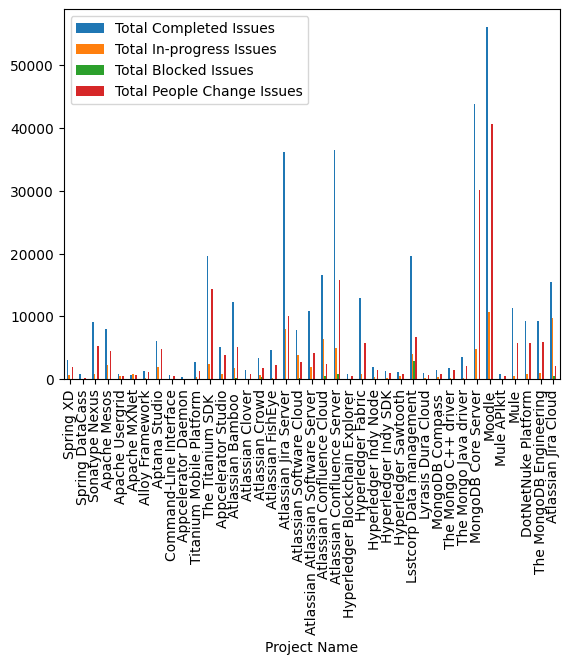

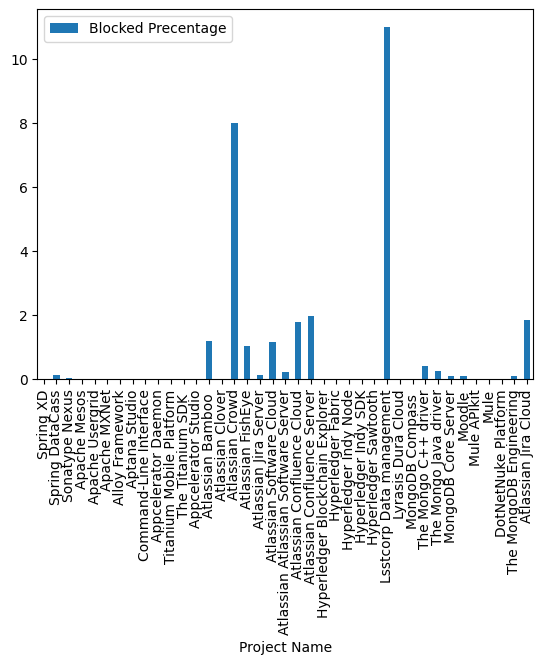

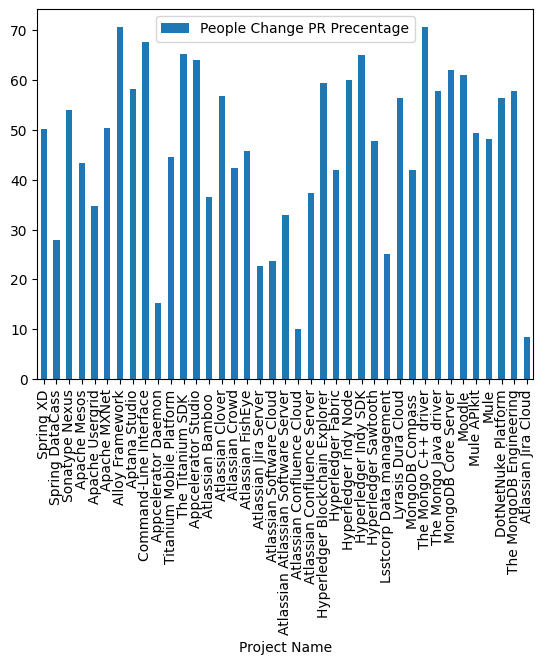

In [85]:
import matplotlib.pyplot as plt

def get_blocked_PR(row):
    return row["Total Blocked Issues"] / (row["Total Completed Issues"] + row["Total In-progress Issues"] + row["Total Blocked Issues"]) * 100

def get_people_change_per(row):
    return row["Total People Change Issues"] / (row["Total Completed Issues"] + row["Total In-progress Issues"] + row["Total Blocked Issues"]) * 100

data1 = df4[["Project Name", "Total Completed Issues", "Total In-progress Issues", "Total Blocked Issues", "Total People Change Issues"]]
data1 = data1.set_index("Project Name")
data1.plot.bar()

# Getting avarage blocked PR compared to completed/blocked
data1["Blocked Precentage"] = data1.apply(get_blocked_PR, axis=1)
data1.plot.bar(y=["Blocked Precentage"])

# Number of PR where PEOPLE changed
data1["People Change PR Precentage"] = data1.apply(get_people_change_per, axis=1)
data1.plot.bar(y=["People Change PR Precentage"])

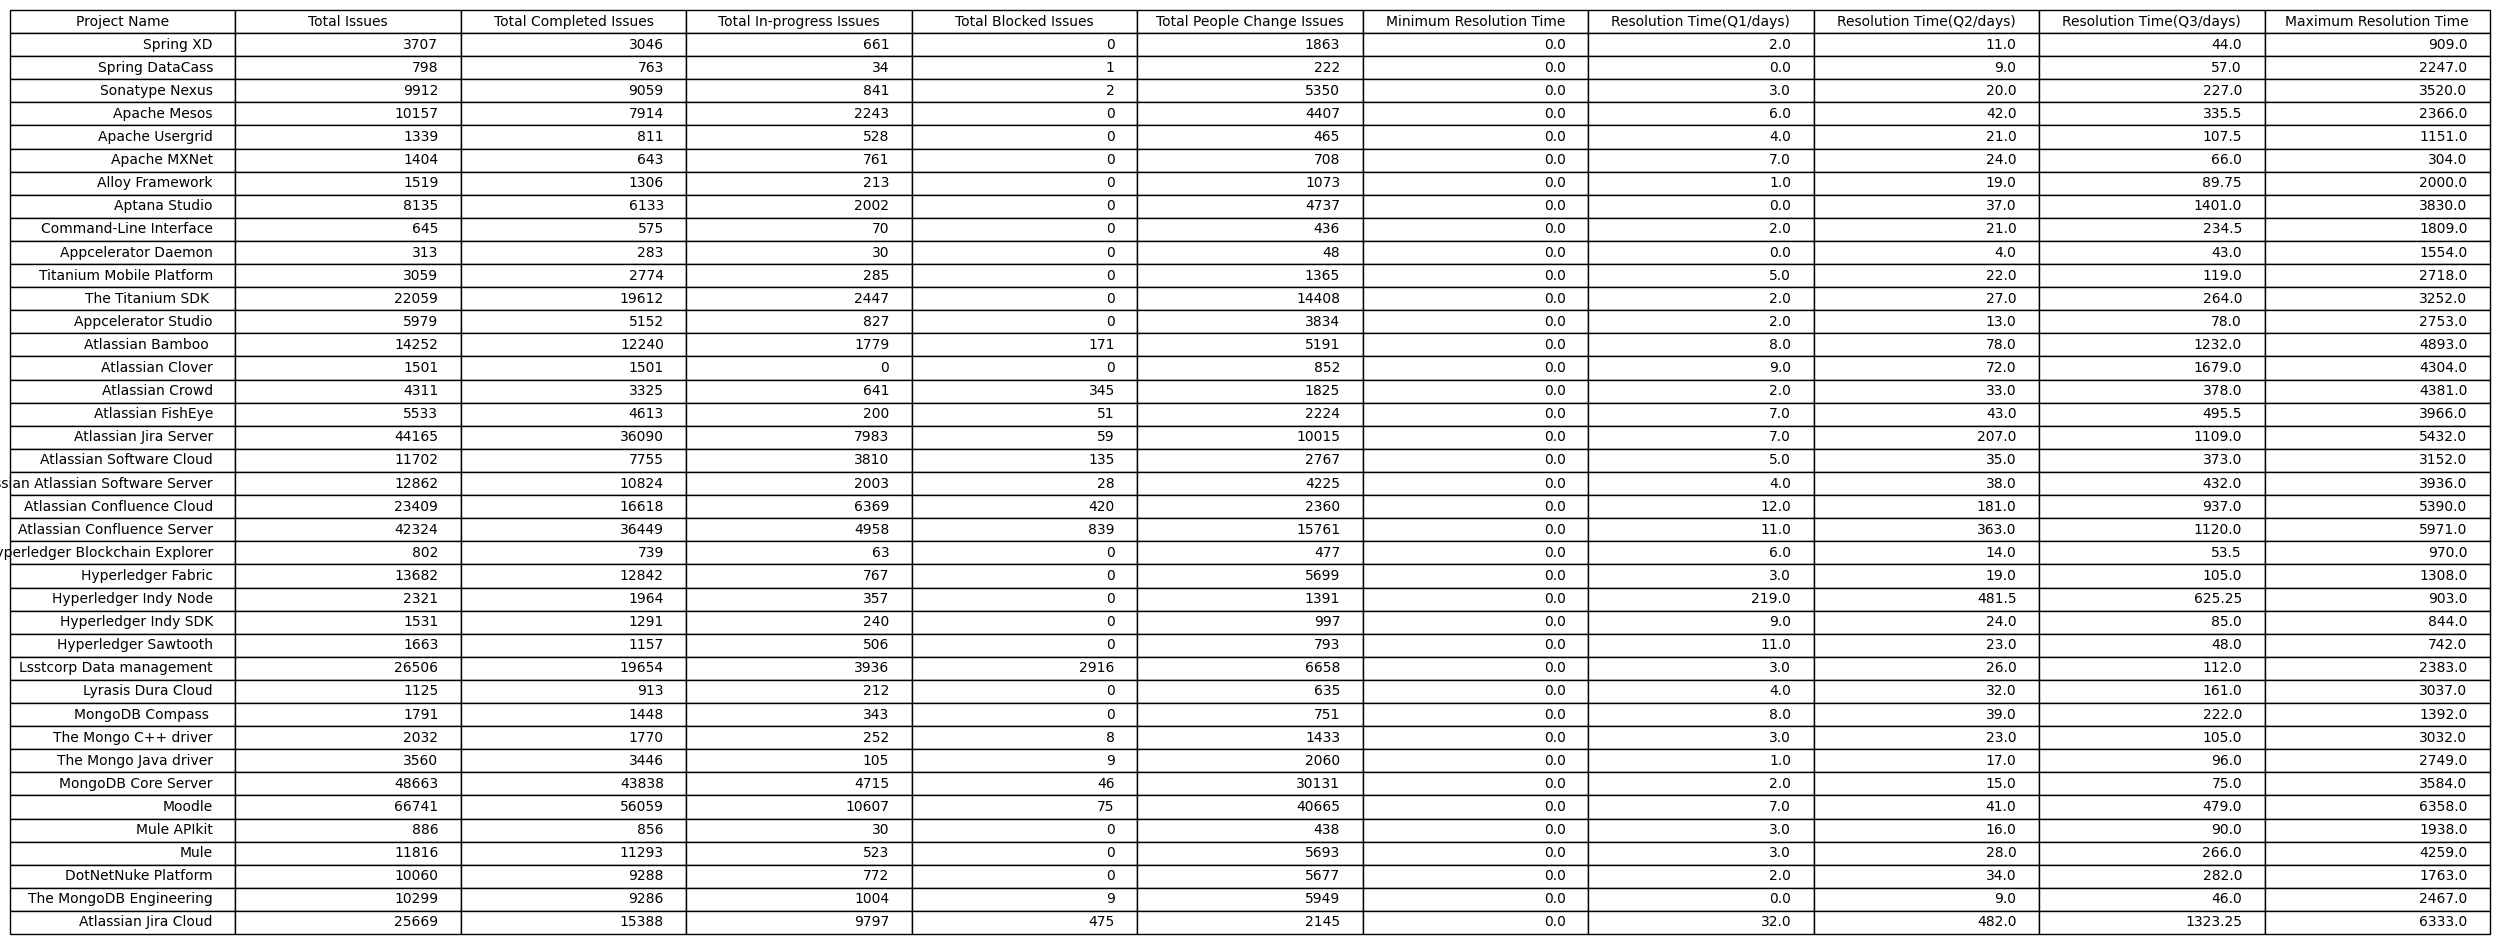

In [102]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(32, 12))  # Adjust the size
ax.axis('tight')
ax.axis('off')
table = ax.table(cellText=df4.values, colLabels=df4.columns, loc='center')

for i, cell in table.get_celld().items():
    cell.set_height(0.025) 

table.auto_set_font_size(False)  # Disable automatic font size adjustment
table.set_fontsize(10)

plt.savefig('table-1.jpg')
plt.show()

C:\Users\Izzath\AppData\Local\Temp\ipykernel_17196\3669236429.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1["IQR"] = data1.apply(get_IQR, axis=1)
C:\Users\Izzath\AppData\Local\Temp\ipykernel_17196\3669236429.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1["Maximum Resolution"] = data1.apply(get_maximum, axis=1)
C:\Users\Izzath\AppData\Local\Temp\ipykernel_17196\3669236429.py:31: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Mat

[[0.0, 2.0, 11.0, 44.0, 107.0], [0.0, 0.0, 9.0, 57.0, 142.5], [0.0, 3.0, 20.0, 227.0, 563.0], [0.0, 6.0, 42.0, 335.5, 829.75], [0.0, 4.0, 21.0, 107.5, 262.75], [0.0, 7.0, 24.0, 66.0, 154.5], [0.0, 1.0, 19.0, 89.75, 222.875], [0.0, 0.0, 37.0, 1401.0, 3502.5], [0.0, 2.0, 21.0, 234.5, 583.25], [0.0, 0.0, 4.0, 43.0, 107.5], [0.0, 5.0, 22.0, 119.0, 290.0], [0.0, 2.0, 27.0, 264.0, 657.0], [0.0, 2.0, 13.0, 78.0, 192.0], [0.0, 8.0, 78.0, 1232.0, 3068.0], [0.0, 2.0, 33.0, 378.0, 942.0], [0.0, 7.0, 43.0, 495.5, 1228.25], [0.0, 7.0, 207.0, 1109.0, 2762.0], [0.0, 5.0, 35.0, 373.0, 925.0], [0.0, 4.0, 38.0, 432.0, 1074.0], [0.0, 12.0, 181.0, 937.0, 2324.5], [0.0, 11.0, 363.0, 1120.0, 2783.5], [0.0, 6.0, 14.0, 53.5, 124.75], [0.0, 3.0, 19.0, 105.0, 258.0], [0.0, 219.0, 481.5, 625.25, 1234.625], [0.0, 9.0, 24.0, 85.0, 199.0], [0.0, 11.0, 23.0, 48.0, 103.5], [0.0, 3.0, 26.0, 112.0, 275.5], [0.0, 4.0, 32.0, 161.0, 396.5], [0.0, 8.0, 39.0, 222.0, 543.0], [0.0, 3.0, 23.0, 105.0, 258.0], [0.0, 1.0, 17.0, 9

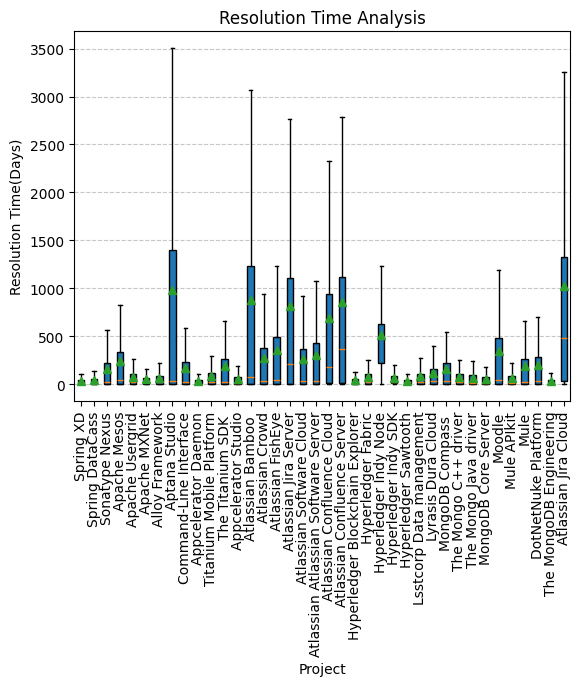

In [80]:
# Generate multiple boxplots
import matplotlib.pyplot as plt

def get_IQR(row):
    return row["Resolution Time(Q3/days)"] - row["Resolution Time(Q1/days)"]

def get_minmum(row):
    return row["Resolution Time(Q1/days)"] - 1.5 * row["IQR"]

def get_maximum(row):
    return row["Resolution Time(Q3/days)"] + 1.5 * row["IQR"]

data1 = df4[["Project Name", "Minimum Resolution Time", "Resolution Time(Q1/days)", "Resolution Time(Q2/days)", "Resolution Time(Q3/days)", "Maximum Resolution Time"]]

data1["IQR"] = data1.apply(get_IQR, axis=1)
# data1["Minmum Resolution"] = data1.apply(get_minmum, axis=1)
data1["Maximum Resolution"] = data1.apply(get_maximum, axis=1)

data1 = data1.loc[lambda df: df["Project Name"] != "Atlassian Clover"]

# Generate box plot data
boxplot_data = data1[["Project Name", "Resolution Time(Q1/days)", "Resolution Time(Q2/days)", "Resolution Time(Q3/days)", "IQR", "Minimum Resolution Time", "Maximum Resolution"]]

custom_boxes = []
for index, group in boxplot_data.iterrows():
    custom_boxes.append([group["Minimum Resolution Time"], group["Resolution Time(Q1/days)"], group["Resolution Time(Q2/days)"], group["Resolution Time(Q3/days)"], group["Maximum Resolution"]])

# Plot boxplots
fig, ax = plt.subplots()
labels = data1["Project Name"]  # Group labels
ax.boxplot(
    custom_boxes,
    labels=labels,
    showmeans=True,   # Optional: Show mean markers
    patch_artist=True # Fill boxplots with color
)

print(custom_boxes)

# Customize the plot
plt.title("Resolution Time Analysis")
plt.xticks(rotation=90)
plt.xlabel("Project")
plt.ylabel("Resolution Time(Days)")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

In [81]:
def generate_freq_change(conn):
    df = pd.read_sql_query("SELECT ID, Name FROM Project", conn)
    rows = []

    for index, project_row in df.iterrows():
       project_id = project_row['ID']
       sql_query = f"SELECT Issue.*, Issue_ID, COUNT(CASE WHEN Change_Log.ID > 0 AND Change_Log.Change_Type='PEOPLE' THEN 1 END) AS Freq FROM Issue INNER JOIN Change_Log ON Issue.ID = Change_Log.Issue_ID GROUP BY Issue.ID HAVING issue.Project_ID = {project_id} and Freq > 0"
       df = pd.read_sql_query(sql_query, conn)
       df['Updated Status'] = df.apply(add_updated_status, axis=1)

       rows.append(generate_analysis(df, project_row["Name"]))


    return pd.DataFrame(rows, columns=["Project Name", "Total Issues", "Total Completed Issues", "Total In-progress Issues", "Total Blocked Issues", "Total People Change Issues", "Minimum Resolution Time", "Resolution Time(Q1/days)", "Resolution Time(Q2/days)", "Resolution Time(Q3/days)", "Maximum Resolution Time"])


df5 = generate_freq_change(conn)
df5


C:\Users\Izzath\AppData\Local\Temp\ipykernel_17196\3871548624.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query("SELECT ID, Name FROM Project", conn)
C:\Users\Izzath\AppData\Local\Temp\ipykernel_17196\3871548624.py:8: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(sql_query, conn)


Spring XD Analysis


C:\Users\Izzath\AppData\Local\Temp\ipykernel_17196\3871548624.py:8: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(sql_query, conn)


Spring DataCass Analysis


C:\Users\Izzath\AppData\Local\Temp\ipykernel_17196\3871548624.py:8: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(sql_query, conn)


Sonatype Nexus Analysis


C:\Users\Izzath\AppData\Local\Temp\ipykernel_17196\3871548624.py:8: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(sql_query, conn)


Apache Mesos Analysis


C:\Users\Izzath\AppData\Local\Temp\ipykernel_17196\3871548624.py:8: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(sql_query, conn)


Apache Usergrid Analysis


C:\Users\Izzath\AppData\Local\Temp\ipykernel_17196\3871548624.py:8: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(sql_query, conn)


Apache MXNet Analysis


C:\Users\Izzath\AppData\Local\Temp\ipykernel_17196\3871548624.py:8: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(sql_query, conn)


Alloy Framework Analysis


C:\Users\Izzath\AppData\Local\Temp\ipykernel_17196\3871548624.py:8: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(sql_query, conn)


Aptana Studio Analysis


C:\Users\Izzath\AppData\Local\Temp\ipykernel_17196\3871548624.py:8: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(sql_query, conn)


Command-Line Interface Analysis


C:\Users\Izzath\AppData\Local\Temp\ipykernel_17196\3871548624.py:8: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(sql_query, conn)


Appcelerator Daemon Analysis


C:\Users\Izzath\AppData\Local\Temp\ipykernel_17196\3871548624.py:8: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(sql_query, conn)


Titanium Mobile Platform Analysis


C:\Users\Izzath\AppData\Local\Temp\ipykernel_17196\3871548624.py:8: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(sql_query, conn)


The Titanium SDK  Analysis


C:\Users\Izzath\AppData\Local\Temp\ipykernel_17196\3871548624.py:8: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(sql_query, conn)


Appcelerator Studio Analysis


C:\Users\Izzath\AppData\Local\Temp\ipykernel_17196\3871548624.py:8: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(sql_query, conn)


Atlassian Bamboo  Analysis


C:\Users\Izzath\AppData\Local\Temp\ipykernel_17196\3871548624.py:8: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(sql_query, conn)


Atlassian Clover Analysis


C:\Users\Izzath\AppData\Local\Temp\ipykernel_17196\3871548624.py:8: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(sql_query, conn)


Atlassian Crowd Analysis


C:\Users\Izzath\AppData\Local\Temp\ipykernel_17196\3871548624.py:8: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(sql_query, conn)


Atlassian FishEye Analysis


C:\Users\Izzath\AppData\Local\Temp\ipykernel_17196\3871548624.py:8: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(sql_query, conn)


Atlassian Jira Server Analysis


C:\Users\Izzath\AppData\Local\Temp\ipykernel_17196\3871548624.py:8: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(sql_query, conn)


Atlassian Software Cloud Analysis


C:\Users\Izzath\AppData\Local\Temp\ipykernel_17196\3871548624.py:8: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(sql_query, conn)


Atlassian Atlassian Software Server Analysis


C:\Users\Izzath\AppData\Local\Temp\ipykernel_17196\3871548624.py:8: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(sql_query, conn)


Atlassian Confluence Cloud Analysis


C:\Users\Izzath\AppData\Local\Temp\ipykernel_17196\3871548624.py:8: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(sql_query, conn)


Atlassian Confluence Server Analysis


C:\Users\Izzath\AppData\Local\Temp\ipykernel_17196\3871548624.py:8: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(sql_query, conn)


Hyperledger Blockchain Explorer Analysis


C:\Users\Izzath\AppData\Local\Temp\ipykernel_17196\3871548624.py:8: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(sql_query, conn)


Hyperledger Fabric Analysis


C:\Users\Izzath\AppData\Local\Temp\ipykernel_17196\3871548624.py:8: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(sql_query, conn)


Hyperledger Indy Node Analysis


C:\Users\Izzath\AppData\Local\Temp\ipykernel_17196\3871548624.py:8: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(sql_query, conn)


Hyperledger Indy SDK Analysis


C:\Users\Izzath\AppData\Local\Temp\ipykernel_17196\3871548624.py:8: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(sql_query, conn)


Hyperledger Sawtooth Analysis


C:\Users\Izzath\AppData\Local\Temp\ipykernel_17196\3871548624.py:8: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(sql_query, conn)


Lsstcorp Data management Analysis


C:\Users\Izzath\AppData\Local\Temp\ipykernel_17196\3871548624.py:8: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(sql_query, conn)


Lyrasis Dura Cloud Analysis


C:\Users\Izzath\AppData\Local\Temp\ipykernel_17196\3871548624.py:8: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(sql_query, conn)


MongoDB Compass  Analysis


C:\Users\Izzath\AppData\Local\Temp\ipykernel_17196\3871548624.py:8: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(sql_query, conn)


The Mongo C++ driver Analysis


C:\Users\Izzath\AppData\Local\Temp\ipykernel_17196\3871548624.py:8: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(sql_query, conn)


The Mongo Java driver Analysis


C:\Users\Izzath\AppData\Local\Temp\ipykernel_17196\3871548624.py:8: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(sql_query, conn)


MongoDB Core Server Analysis


C:\Users\Izzath\AppData\Local\Temp\ipykernel_17196\3871548624.py:8: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(sql_query, conn)


Moodle Analysis


C:\Users\Izzath\AppData\Local\Temp\ipykernel_17196\3871548624.py:8: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(sql_query, conn)


Mule APIkit Analysis


C:\Users\Izzath\AppData\Local\Temp\ipykernel_17196\3871548624.py:8: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(sql_query, conn)


Mule Analysis


C:\Users\Izzath\AppData\Local\Temp\ipykernel_17196\3871548624.py:8: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(sql_query, conn)


DotNetNuke Platform Analysis


C:\Users\Izzath\AppData\Local\Temp\ipykernel_17196\3871548624.py:8: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(sql_query, conn)


The MongoDB Engineering Analysis


C:\Users\Izzath\AppData\Local\Temp\ipykernel_17196\3871548624.py:8: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(sql_query, conn)


Atlassian Jira Cloud Analysis


,Project Name,Total Issues,Total Completed Issues,Total In-progress Issues,Total Blocked Issues,Total People Change Issues,Minimum Resolution Time,Resolution Time(Q1/days),Resolution Time(Q2/days),Resolution Time(Q3/days),Maximum Resolution Time
0,Spring XD,1863,1770,93,0,1863,0.0,3.00,11.0,32.75,840.0
1,Spring DataCass,222,216,6,0,222,0.0,10.75,62.0,439.50,2247.0
2,Sonatype Nexus,5350,5282,65,2,5350,0.0,4.00,15.0,72.00,2506.0
3,Apache Mesos,4407,3956,451,0,4407,0.0,11.00,58.0,357.50,2366.0
4,Apache Usergrid,465,396,69,0,465,0.0,5.00,26.0,99.25,1151.0
5,Apache MXNet,708,481,227,0,708,0.0,6.25,14.0,43.50,279.0
6,Alloy Framework,1073,929,144,0,1073,0.0,2.00,23.0,108.00,2000.0
7,Aptana Studio,4737,3039,1698,0,4737,0.0,0.00,14.0,780.00,3830.0
8,Command-Line Interface,436,375,61,0,436,0.0,5.00,49.0,459.00,1809.0
9,Appcelerator Daemon,48,46,2,0,48,0.0,1.00,7.5,70.50,1216.0


<Axes: xlabel='Project Name'>

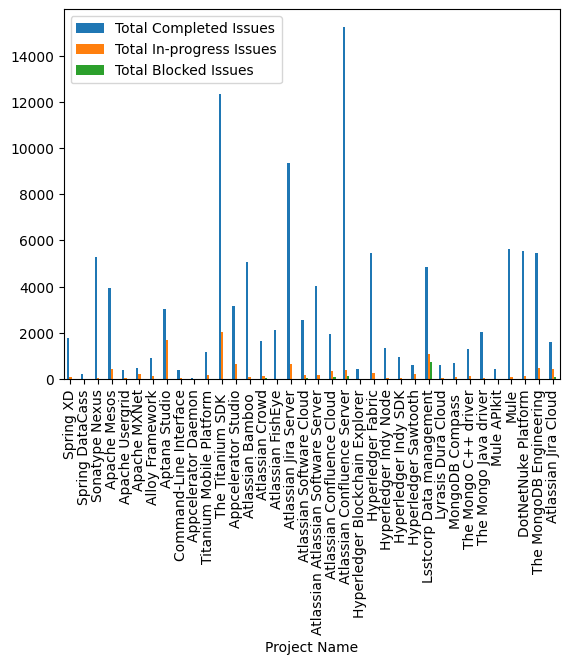

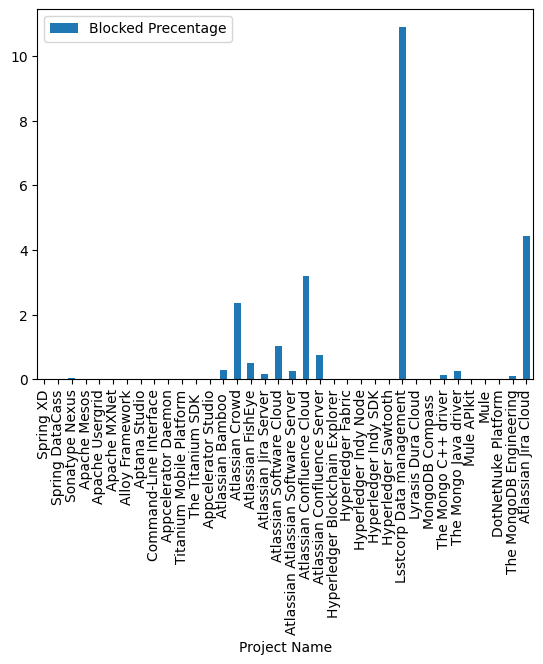

In [84]:
data2 = df5[["Project Name", "Total Completed Issues", "Total In-progress Issues", "Total Blocked Issues"]]
data2 = data2.loc[lambda df: df["Project Name"] != "Moodle"]
data2 = data2.loc[lambda df: df["Project Name"] != "MongoDB Core Server"]
data2 = data2.loc[lambda df: df["Project Name"] != "Atlassian Clover"]
data2 = data2.set_index("Project Name")
data2.plot.bar()

# Getting avarage blocked PR compared to completed/blocked
data2["Blocked Precentage"] = data2.apply(get_blocked_PR, axis=1)
data2.plot.bar(y=["Blocked Precentage"])

C:\Users\Izzath\AppData\Local\Temp\ipykernel_17196\4157930822.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2["IQR"] = data2.apply(get_IQR, axis=1)
C:\Users\Izzath\AppData\Local\Temp\ipykernel_17196\4157930822.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2["Maximum Resolution"] = data2.apply(get_maximum, axis=1)
C:\Users\Izzath\AppData\Local\Temp\ipykernel_17196\4157930822.py:21: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matpl

[[0.0, 3.0, 11.0, 32.75, 77.375], [0.0, 10.75, 62.0, 439.5, 1082.625], [0.0, 4.0, 15.0, 72.0, 174.0], [0.0, 11.0, 58.0, 357.5, 877.25], [0.0, 5.0, 26.0, 99.25, 240.625], [0.0, 6.25, 14.0, 43.5, 99.375], [0.0, 2.0, 23.0, 108.0, 267.0], [0.0, 0.0, 14.0, 780.0, 1950.0], [0.0, 5.0, 49.0, 459.0, 1140.0], [0.0, 1.0, 7.5, 70.5, 174.75], [0.0, 10.0, 53.5, 244.5, 596.25], [0.0, 13.0, 86.0, 505.75, 1244.875], [0.0, 5.0, 20.0, 114.0, 277.5], [0.0, 8.0, 29.0, 176.0, 428.0], [0.0, 5.0, 34.0, 334.0, 827.5], [0.0, 9.0, 28.0, 165.0, 399.0], [0.0, 8.0, 54.0, 365.0, 900.5], [0.0, 3.0, 14.0, 120.0, 295.5], [0.0, 2.0, 20.0, 199.0, 494.5], [0.0, 7.0, 30.0, 160.0, 389.5], [0.0, 10.0, 126.0, 1038.0, 2580.0], [0.0, 7.0, 15.0, 52.0, 119.5], [0.0, 6.0, 29.0, 114.0, 276.0], [0.0, 183.0, 423.0, 623.0, 1283.0], [0.0, 10.0, 22.0, 51.0, 112.5], [0.0, 13.0, 26.0, 59.0, 128.0], [0.0, 14.0, 73.0, 196.0, 469.0], [0.0, 4.0, 27.0, 103.0, 251.5], [0.0, 9.0, 32.0, 119.25, 284.625], [0.0, 6.0, 31.5, 120.0, 291.0], [0.0, 4.0,

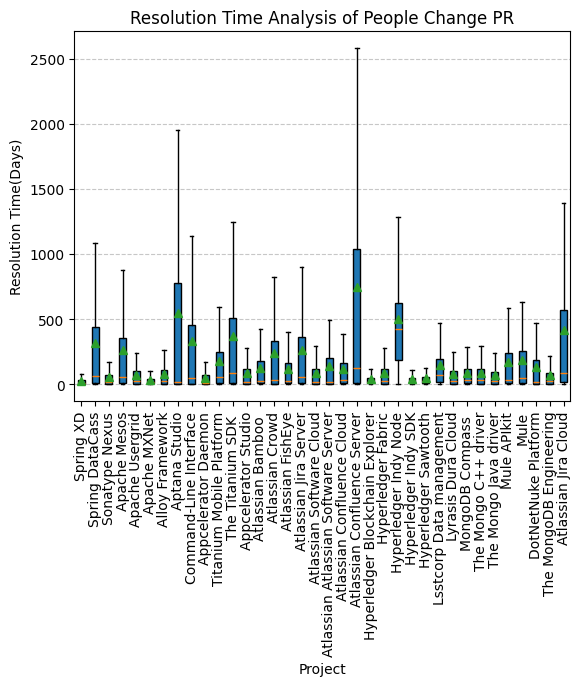

In [83]:
data2 = df5[["Project Name", "Minimum Resolution Time", "Resolution Time(Q1/days)", "Resolution Time(Q2/days)", "Resolution Time(Q3/days)", "Maximum Resolution Time"]]

data2["IQR"] = data2.apply(get_IQR, axis=1)
# data1["Minmum Resolution"] = data1.apply(get_minmum, axis=1)
data2["Maximum Resolution"] = data2.apply(get_maximum, axis=1)

data2 = data2.loc[lambda df: df["Project Name"] != "Moodle"]
data2 = data2.loc[lambda df: df["Project Name"] != "MongoDB Core Server"]
data2 = data2.loc[lambda df: df["Project Name"] != "Atlassian Clover"]

# Generate box plot data
boxplot_data = data2[["Project Name", "Resolution Time(Q1/days)", "Resolution Time(Q2/days)", "Resolution Time(Q3/days)", "IQR", "Minimum Resolution Time", "Maximum Resolution"]]

custom_boxes = []
for index, group in boxplot_data.iterrows():
    custom_boxes.append([group["Minimum Resolution Time"], group["Resolution Time(Q1/days)"], group["Resolution Time(Q2/days)"], group["Resolution Time(Q3/days)"], group["Maximum Resolution"]])

# Plot boxplots
fig, ax = plt.subplots()
labels = data2["Project Name"]  # Group labels
ax.boxplot(
    custom_boxes,
    labels=labels,
    showmeans=True,   # Optional: Show mean markers
    patch_artist=True # Fill boxplots with color
)

print(custom_boxes)

# Customize the plot
plt.title("Resolution Time Analysis of People Change PR")
plt.xticks(rotation=90)
plt.xlabel("Project")
plt.ylabel("Resolution Time(Days)")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

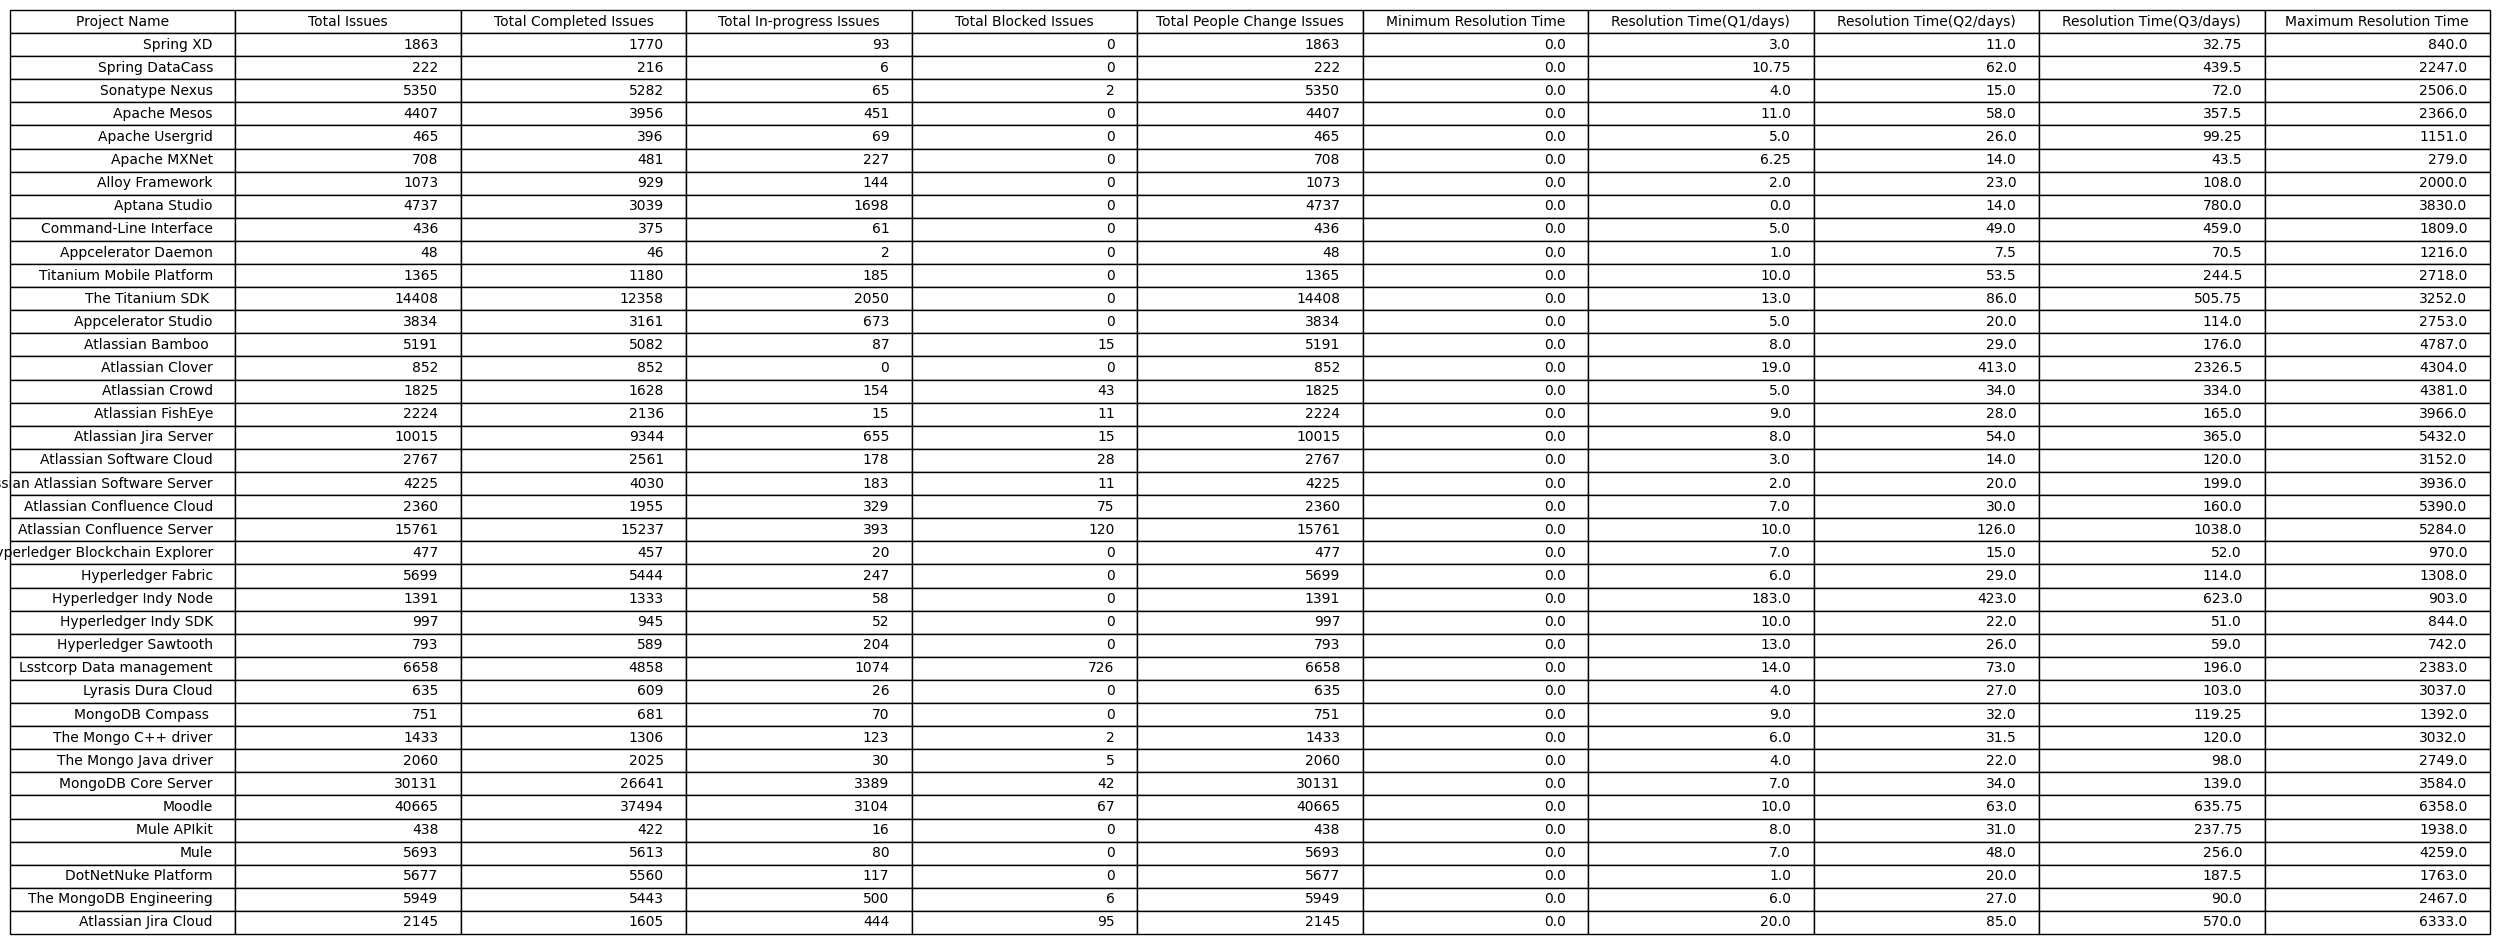

In [103]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(32, 12))  # Adjust the size
ax.axis('tight')
ax.axis('off')
table = ax.table(cellText=df5.values, colLabels=df5.columns, loc='center')

for i, cell in table.get_celld().items():
    cell.set_height(0.025) 

table.auto_set_font_size(False)  # Disable automatic font size adjustment
table.set_fontsize(10)

plt.savefig('table-1.jpg')
plt.show()